In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
from scipy.stats import gaussian_kde,kde,ks_2samp,entropy
timestr=time.strftime("%m%d")
from matplotlib import colormaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
stdsalt_drug_files=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/*dat')
print(len(stdsalt_drug_files))

224


In [3]:
all_files_data=[]
min_length=[]
for i, file in enumerate(stdsalt_drug_files[:100]):
     # Start with fewer files
    try:
        #print(f"Processing file {i+1}: {os.path.basename(file)}")
        df = pd.read_csv(file,chunksize=100000)
        for chunk in df:
            df_chunk=chunk[['sweep','NE']]
            df_cut=df_chunk[df_chunk['sweep']<=8*10**6]
            all_files_data.append(df_cut)
            del chunk
            del df_chunk
        del df

    except Exception as e:
        #print(f"Error processing file {file}: {e}")
        continue

In [4]:
print(np.min(min_length))

ValueError: zero-size array to reduction operation minimum which has no identity

In [4]:

combined_data=pd.DataFrame()
if all_files_data:
    # Concatenate all data
    combined_data = pd.concat(all_files_data, ignore_index=True)
    #combined_data['seconds']=combined_data['seconds']*10**(-5) 
    # Group by sweep and calculate mean
    final_result = combined_data.groupby('NE')['sweep'].agg(['mean', 'count']).reset_index()
    final_result2=combined_data.groupby('sweep')['NE'].agg(['mean','count']).reset_index()
    final_result.columns = ['NE', 'average_sweep', 'count']
    final_result2.columns=['Sweep','average_NE','count']
    #print("Final aggregated data:")
    #print(final_result.head(10))
    print(f"Total unique sweeps: {len(final_result2)}")
else:
    print("No data was successfully processed")
del combined_data
    

Total unique sweeps: 4644228


In [5]:
print(final_result2)

           Sweep  average_NE  count
0              0    3.000000     50
1           1000    3.280000     50
2           2000    3.040000     50
3           3000    3.160000     50
4           4000    3.000000     50
...          ...         ...    ...
4644223  7999996  277.666667      3
4644224  7999997  277.666667      3
4644225  7999998  277.666667      3
4644226  7999999  277.666667      3
4644227  8000000   46.454545     55

[4644228 rows x 3 columns]


In [7]:
array_1=np.asarray([3, 4, 5, 6, 8, 2, 1, 9, 6])
print(array_1)
df=pd.DataFrame()
df['a']=array_1
print(df[df['a']==6].index[0])

[3 4 5 6 8 2 1 9 6]
3


In [7]:

print(len(all_files_data))


3698


In [5]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()



0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


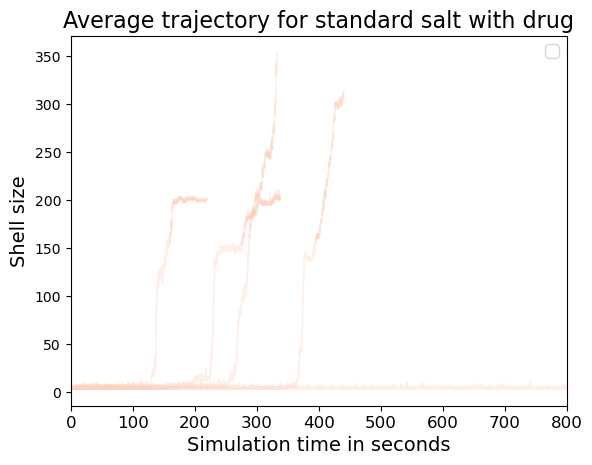

In [ ]:
markerarraystd=mpl.colormaps['Reds'](np.linspace(0.2,0.4,10))
#df_avg=pd.read_csv('avg_stdwdrug_sweep.csv')
#df_avg_new=final_result2[final_result2['count']>30]
#df_avg_new['avg']=df_avg_new['avg'].astype(int)

count=0
#for df in all_files_data:
   # plt.plot(df['sweep'],df['NE'],color=markerarraystd[count],linewidth=2.0,alpha=0.5)
   # count += 1
#print(count)
#plt.plot(df_avg_new['Sweep'],df_avg_new['average_NE'],color='black',linewidth=2.0,alpha=0.8,label='Average')
for file in stdsalt_drug_files[0:10]:
    df = pd.read_csv(file,chunksize=100000)
    for chunk in df:
        cut_chunk=chunk[['sweep','NE']]
        plt.plot(chunk['sweep'],chunk['NE'],color=markerarraystd[count],linewidth=1.0,alpha=0.3)
    count+=1
plt.legend(fontsize=12)
plt.xlim(0,10**8)
#plt.ylim(0,60)
original_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in original_ticks]
plt.xticks(ticks=original_ticks, labels=new_labels)
plt.xticks(fontsize=12)
plt.xlabel('Simulation time in seconds',fontsize=14)
plt.ylabel('Shell size',fontsize=14)
plt.title('Average trajectory for standard salt with drug',fontsize=16)
plt.savefig('stdsalt_drug_avg_trajectory1.png',dpi=300,bbox_inches='tight')

In [5]:
import pickle

with open("dfs_stdwdrug.pkl", "wb") as f:
    pickle.dump(all_files_data_new, f)


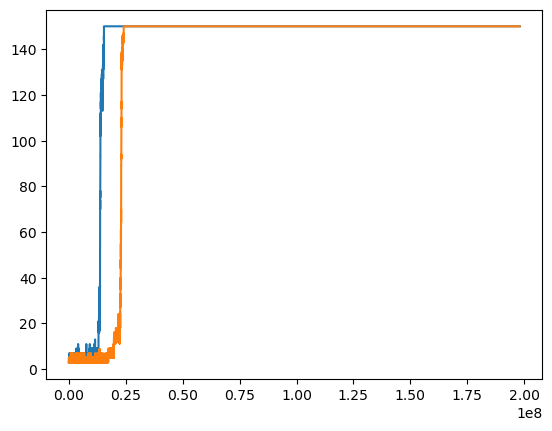

In [5]:
for df in all_files_data_new[0:2]:
    plt.plot(df['sweep'], df['NE'], label='NE vs Sweep')

In [4]:
 
from itertools import islice
def concat_in_chunks(dfs, chunk_size=10):
    it = iter(dfs)
    out = []
    for chunk in iter(lambda: list(itertools.islice(it, chunk_size)), []):
        out.append(pd.concat(chunk, axis=0))
    return pd.concat(out, axis=0)

In [6]:
import pickle
import pandas as pd
df_all=pickle.load(open("dfs_stdwdrug.pkl", "rb"))
concat_chunked=concat_in_chunks(df_all, chunk_size=5)

: 

In [8]:
stats=[]
chunksize=10
combined_chunk=[]
for i in range(0, len(all_files_data_new), chunksize):
    chunk = all_files_data_new[i:i + chunksize]
    stats=[]
    for df in chunk:
        stats.append(df.groupby('sweep')['NE'].agg(['sum','count']))
        del df
    combined_chunk.append(pd.concat(stats).groupby(level=0).sum())
    del stats
    del chunk
        




In [9]:
final_chunk=pd.concat(combined_chunk).groupby(level=0).sum()

In [11]:
final_chunk['avg']=final_chunk['sum']/final_chunk['count']
final_chunk.to_csv('avg_stdwdrug_sweep.csv')

In [ ]:
print(final_chunk.head())

In [5]:
# Simple approach - just concatenate all data

from itertools import islice

def concat_in_chunks(dfs, chunk_size=10):
    it = iter(dfs)
    out = []
    for chunk in iter(lambda: list(islice(it, chunk_size)), []):
        out.append(pd.concat(chunk, axis=0))
    return pd.concat(out, axis=0)

df_all = concat_in_chunks(all_files_data_new, chunk_size=10)
"""""
combined_data=pd.DataFrame()
if all_files_data_new[0:5]:
    # Concatenate all data
    combined_data = pd.concat(all_files_data_new, ignore_index=True)
    #combined_data['seconds']=combined_data['seconds']*10**(-5) 
    # Group by sweep and calculate mean
    final_result = combined_data.groupby('NE')['sweep'].agg(['mean', 'count']).reset_index()
    final_result2=combined_data.groupby('sweep')['NE'].agg(['mean','count']).reset_index()
    final_result.columns = ['NE', 'average_sweep', 'count']
    final_result2.columns=['Sweep','average_NE','count']
    #print("Final aggregated data:")
    #print(final_result.head(10))
    print(f"Total unique sweeps: {len(final_result2)}")
else:
    print("No data was successfully processed")
    """

: 

In [6]:
print(final_result2)
final_resultn=final_result2[final_result2['count']>40]
print(final_resultn)

           Sweep  average_NE  count
0              0    3.000000     76
1            100    3.184211     76
2            200    3.236842     76
3            300    3.236842     76
4            400    3.236842     76
...          ...         ...    ...
183974  18390100  120.000000     76
183975  18390200  120.000000     76
183976  18390300  120.000000     76
183977  18390400  120.000000      1
183978  18390442  120.000000      1

[183979 rows x 3 columns]
           Sweep  average_NE  count
0              0    3.000000     76
1            100    3.184211     76
2            200    3.236842     76
3            300    3.236842     76
4            400    3.236842     76
...          ...         ...    ...
183972  18389900  120.000000     76
183973  18390000  120.000000     76
183974  18390100  120.000000     76
183975  18390200  120.000000     76
183976  18390300  120.000000     76

[183904 rows x 3 columns]


In [8]:
final_result2.to_csv('./average_traj_stdsalt_wodrug.csv',index=False)

In [75]:
xlabel_ticks=np.arange(0, max_sweep+100)*10**(-5)

150


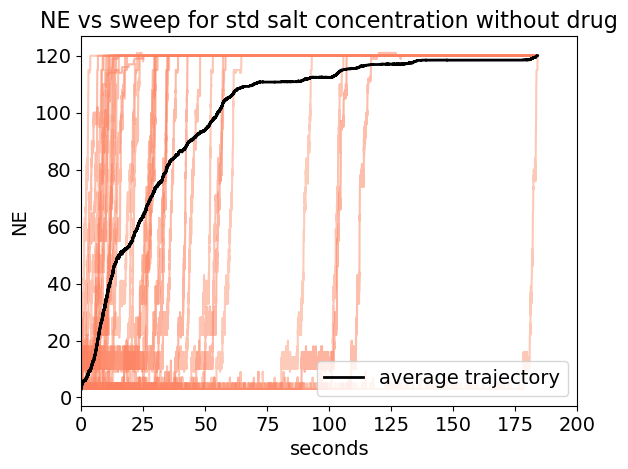

<Figure size 640x480 with 0 Axes>

In [ ]:
markerarraystd=mpl.colormaps['Reds'](np.linspace(0.3,0.8,150))
count=0
print(len(without_drug_files))
#for df in all_files_data_new[0:40]:
#        #print(df['s'].iloc[-1])
#        count+=1
#        plt.plot(df['sweep'],df['NE'],color=markerarraystd[count],alpha=0.6)
plt.plot(final_resultn['Sweep'],final_resultn['average_NE'],color='black',linewidth=2,label='average trajectory')
#plt.xscale('log')
orginal_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in orginal_ticks]
plt.xticks(orginal_ticks, new_labels)
plt.xlabel('seconds',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('NE',fontsize=14)
plt.xlim(0, 2*10**7)
plt.title('NE vs sweep for std salt concentration without drug',fontsize=16)
plt.legend(fontsize=14,loc='lower right')
plt.show()
plt.savefig('NE_vs_sweep_stdsalt_wodrug.png', dpi=300, bbox_inches='tight')

In [63]:
# Percentile-based binning (equal frequency bins)
if all_files_data:
    combined_data = pd.concat(all_files_data, ignore_index=True)
    
    # Create quantile-based bins (e.g., 20 bins with equal number of data points)
    n_bins = 20
    combined_data['sweep_quantile'] = pd.qcut(
        combined_data['sweep'], 
        q=n_bins, 
        labels=False
    )
    
    # Get the actual sweep ranges for each quantile
    quantile_ranges = combined_data.groupby('sweep_quantile')['sweep'].agg(['min', 'max']).reset_index()
    quantile_ranges['sweep_range'] = quantile_ranges.apply(
        lambda row: f"{row['min']}-{row['max']}", axis=1
    )
    
    # Calculate statistics for each quantile
    quantile_stats = combined_data.groupby('sweep_quantile')['NE'].agg([
        'mean', 'std', 'count'
    ]).reset_index()
    
    # Merge the results
    quantile_result = pd.merge(quantile_ranges, quantile_stats, on='sweep_quantile')
    
    print("Quantile-based binning:")
    print(quantile_result[['sweep_range', 'mean', 'std', 'count']].head(10))

Quantile-based binning:
       sweep_range       mean        std  count
0         0-198000   5.893983   7.334998  97069
1    198100-396900   8.814403  15.782194  97060
2    397000-599200  10.691156  18.149975  97104
3    599300-805000  15.532179  25.376818  97065
4   805100-1023000  17.409310  28.544493  97056
5  1023100-1258200  19.850191  32.285162  97037
6  1258300-1523100  19.046852  33.148905  97072
7  1523200-1815000  15.287556  30.513054  97063
8  1815100-2127400  13.049959  25.774687  97079
9  2127500-2450800  18.243690  33.185885  97062


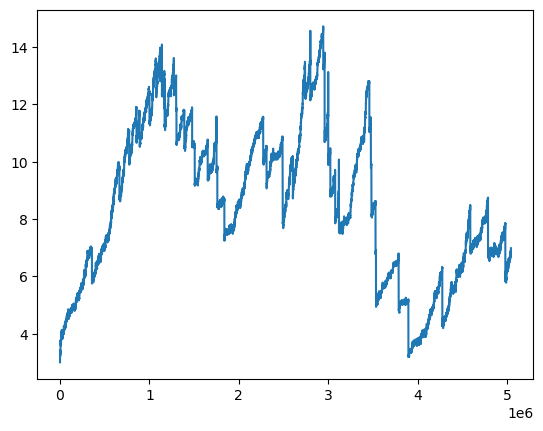

In [26]:
plt.plot(final_aggregated['sweep'],final_aggregated['average_NE'])

In [ ]:
files=glob.glob('0211-HPC/allenergy/*6.5*en*')
print(files)

plt.figure(figsize=[16,10])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t4=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['42','120'] :
            t4+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size)
            #plt.title('T4')
            #sys.exit()
#plt.title('T4, %d trajectories'%t4,fontsize=20);

#plt.figure(figsize=[20,5])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t3=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['32','90']:
            t3+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size,'k')
            plt.xlim([0,100000])
plt.tight_layout()            
#plt.title('T3, %d trajectories'%t3,fontsize=20);
#plt.savefig('../../TrajectoriesT3T4-02.png',dpi=300)
            #sys.exit()            